# image에 bbox 그리기

In [1]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from PIL import Image, ImageDraw
import io
from IPython.display import display
import matplotlib.pyplot as plt

In [4]:
ROOT_DIR = 'D:/rawdata_disease/house/train'

In [6]:
image_file_list = os.listdir(ROOT_DIR)
image_file_list = image_file_list[:5]
image_file_list

['image_tomato_0.normal.zip',
 'image_tomato_1.disease',
 'image_tomato_1.disease.zip',
 'image_tomato_9.disease(1).zip',
 'image_tomato_9.disease(2).zip']

### 질병1

In [5]:
df = pd.read_csv('total_df.csv', index_col=0)
df

,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,xtl,ytl,xbr,ybr,file
0,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1864, 'ytl': 1516, 'xbr': 2292, 'ybr'...",1864,1516,2292,1880,0
1,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1722, 'ytl': 436, 'xbr': 2167, 'ybr':...",1722,436,2167,676,0
2,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2150, 'ytl': 100, 'xbr': 2727, 'ybr':...",2150,100,2727,784,0
3,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2147, 'ytl': 102, 'xbr': 2729, 'ybr':...",2147,102,2729,782,0
4,V006_77_0_00_11_01_13_0_c01_20201013_0002_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1979, 'ytl': 832, 'xbr': 2719, 'ybr':...",1979,832,2719,1462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19025,V006_77_1_19_11_03_12_3_9357q_20201130_8_a0005...,2020/11/30,NaN,3024,4032,77,1,17.0,19,11,3,12,3,"[{'xtl': 644, 'ytl': 438, 'xbr': 3636, 'ybr': ...",644,438,3636,2526,9
19026,V006_77_1_19_11_03_12_3_9357q_20201130_8_a0006...,2020/11/30,NaN,3024,4032,77,1,17.0,19,11,3,12,3,"[{'xtl': 644, 'ytl': 497, 'xbr': 3636, 'ybr': ...",644,497,3636,2586,9
19027,V006_77_1_19_11_03_12_3_9357q_20201130_8_a0007...,2020/11/30,NaN,3024,4032,77,1,17.0,19,11,3,12,3,"[{'xtl': 644, 'ytl': 497, 'xbr': 3636, 'ybr': ...",644,497,3636,2586,9
19028,V006_77_1_19_11_03_12_3_9357q_20201130_8_a0008...,2020/11/30,NaN,4032,3024,77,1,17.0,19,11,3,12,3,"[{'xtl': 497, 'ytl': 396, 'xbr': 2586, 'ybr': ...",497,396,2586,3388,9


In [7]:
df = df[df.file==1]
df

,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,xtl,ytl,xbr,ybr,file
0,V006_77_1_18_11_03_13_1_3248b_20201005_57.jpg,2020/10/05,NaN,3024,4032,77,1,4.0,18,11,3,13,1,"[{'xtl': 908, 'ytl': 916, 'xbr': 3104, 'ybr': ...",908,916,3104,2312,1
1,V006_77_1_18_11_03_13_1_3248b_20201012_60.jpg,2020/10/12,NaN,3024,4032,77,1,4.0,18,11,3,13,1,"[{'xtl': 1108, 'ytl': 556, 'xbr': 3356, 'ybr':...",1108,556,3356,2260,1
2,V006_77_1_18_11_03_13_1_3248b_20201012_61.jpg,2020/10/12,NaN,3024,4032,77,1,4.0,18,11,3,13,1,"[{'xtl': 1152, 'ytl': 772, 'xbr': 3232, 'ybr':...",1152,772,3232,2420,1
3,V006_77_1_18_11_03_13_1_3248b_20201012_64.jpg,2020/10/12,NaN,3024,4032,77,1,4.0,18,11,3,13,1,"[{'xtl': 540, 'ytl': 544, 'xbr': 2756, 'ybr': ...",540,544,2756,2224,1
4,V006_77_1_18_11_03_13_1_3248b_20201019_67.jpg,2020/10/19,NaN,3024,4032,77,1,4.0,18,11,3,13,1,"[{'xtl': 648, 'ytl': 852, 'xbr': 3340, 'ybr': ...",648,852,3340,2524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,V006_77_1_19_11_03_12_3_9357q_20201130_28.jpeg,2020/11/30,NaN,3024,4032,77,1,17.0,19,11,3,12,3,"[{'xtl': 273, 'ytl': 1004, 'xbr': 3056, 'ybr':...",273,1004,3056,2244,1
1963,V006_77_1_19_11_03_12_3_9357q_20201130_29.jpeg,2020/11/30,NaN,3024,4032,77,1,17.0,19,11,3,12,3,"[{'xtl': 23, 'ytl': 605, 'xbr': 3575, 'ybr': 2...",23,605,3575,2571,1
1964,V006_77_1_19_11_03_12_3_9357q_20201130_3.jpeg,2020/11/30,NaN,3024,4032,77,1,17.0,19,11,3,12,3,"[{'xtl': 256, 'ytl': 398, 'xbr': 3576, 'ybr': ...",256,398,3576,2924,1
1965,V006_77_1_19_11_03_12_3_9357q_20201130_7.jpeg,2020/11/30,NaN,3024,4032,77,1,17.0,19,11,3,12,3,"[{'xtl': 729, 'ytl': 545, 'xbr': 3735, 'ybr': ...",729,545,3735,2612,1


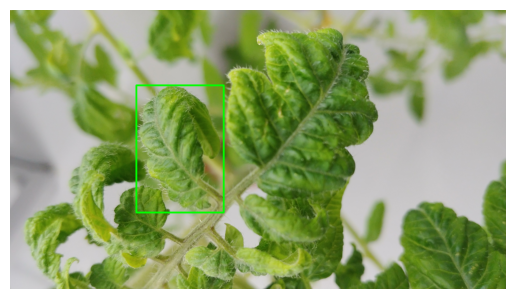

V006_77_1_19_11_03_12_2_2851q_20201209_21.jpeg


V006_77_1_19_11_03_12_2_2851q_20201209_21.jpeg


In [30]:
num = 1230

image_dir = 'D:\\rawdata_disease\\house\\train\\image_tomato_1.disease'
image_list = os.listdir(image_dir)
image_path = os.path.join(image_dir, image_list[num])

# 이미지 로드
image = cv2.imread(image_path)

# 직사각형 그리기
xtl = df.iloc[num]['xtl']
ytl = df.iloc[num]['ytl']
xbr = df.iloc[num]['xbr']
ybr = df.iloc[num]['ybr']
    
cv2.rectangle(image, (xtl, ytl), (xbr, ybr), (0, 255, 0), 15)

# 이미지 표시
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

print(image_path.split('\\')[-1])
print('\n')
print(df.iloc[num]['image'])

### 정상

In [8]:
normal = df[df.file == 0]
normal

,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,xtl,ytl,xbr,ybr,file
0,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1864, 'ytl': 1516, 'xbr': 2292, 'ybr'...",1864,1516,2292,1880,0
1,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1722, 'ytl': 436, 'xbr': 2167, 'ybr':...",1722,436,2167,676,0
2,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2150, 'ytl': 100, 'xbr': 2727, 'ybr':...",2150,100,2727,784,0
3,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2147, 'ytl': 102, 'xbr': 2729, 'ybr':...",2147,102,2729,782,0
4,V006_77_0_00_11_01_13_0_c01_20201013_0002_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1979, 'ytl': 832, 'xbr': 2719, 'ybr':...",1979,832,2719,1462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13504,V006_77_0_00_11_05_13_0_c42_20201028_0066_S01_...,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,5,13,0,"[{'xtl': 3, 'ytl': 737, 'xbr': 4027, 'ybr': 20...",3,737,4027,2065,0
13505,V006_77_0_00_11_05_13_0_c42_20201028_0067_S01.jpg,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,5,13,0,"[{'xtl': 0, 'ytl': 905, 'xbr': 4023, 'ybr': 17...",0,905,4023,1745,0
13506,V006_77_0_00_11_05_13_0_c42_20201028_0067_S01_...,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,5,13,0,"[{'xtl': 0, 'ytl': 953, 'xbr': 4031, 'ybr': 16...",0,953,4031,1697,0
13507,V006_77_0_00_11_05_13_0_c42_20201028_0068_S01.jpg,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,5,13,0,"[{'xtl': 0, 'ytl': 1105, 'xbr': 4032, 'ybr': 2...",0,1105,4032,2113,0


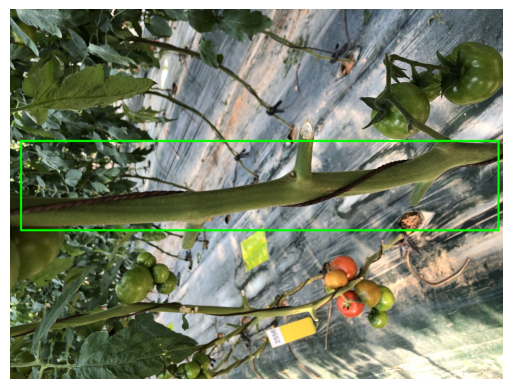

V006_77_0_00_11_05_13_0_c05_20201111_0025_S01_1.JPG


V006_77_0_00_11_05_13_0_c05_20201111_0025_S01_1.JPG


In [17]:
num=13000

with zipfile.ZipFile(os.path.join(ROOT_DIR, image_file_list[0]), 'r') as zip_ref:
    file_list = zip_ref.namelist()
    
    with zip_ref.open(file_list[num]) as file:
        image_data = file.read()
         
        # 이미지 로드
        image_np = np.frombuffer(image_data, np.uint8)
        image = cv2.imdecode(image_np, cv2.IMREAD_COLOR)

        # 직사각형 그리기
        xtl = normal.iloc[num]['xtl']
        ytl = normal.iloc[num]['ytl']
        xbr = normal.iloc[num]['xbr']
        ybr = normal.iloc[num]['ybr']

        cv2.rectangle(image, (xtl, ytl), (xbr, ybr), (0, 255, 0), 15)

        # 이미지 표시
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

        print(file_list[num])
        print('\n')
        print(normal.iloc[num]['image'])


# etc

In [2]:
df = pd.read_csv('total_df.csv', index_col=0)
df.head(3)

,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,xtl,ytl,xbr,ybr,file
0,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1864, 'ytl': 1516, 'xbr': 2292, 'ybr'...",1864,1516,2292,1880,0
1,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1722, 'ytl': 436, 'xbr': 2167, 'ybr':...",1722,436,2167,676,0
2,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2150, 'ytl': 100, 'xbr': 2727, 'ybr':...",2150,100,2727,784,0


In [4]:
df = df[df.file == 0]
df

,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,xtl,ytl,xbr,ybr,file
0,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1864, 'ytl': 1516, 'xbr': 2292, 'ybr'...",1864,1516,2292,1880,0
1,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1722, 'ytl': 436, 'xbr': 2167, 'ybr':...",1722,436,2167,676,0
2,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2150, 'ytl': 100, 'xbr': 2727, 'ybr':...",2150,100,2727,784,0
3,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2147, 'ytl': 102, 'xbr': 2729, 'ybr':...",2147,102,2729,782,0
4,V006_77_0_00_11_01_13_0_c01_20201013_0002_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1979, 'ytl': 832, 'xbr': 2719, 'ybr':...",1979,832,2719,1462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13504,V006_77_0_00_11_05_13_0_c42_20201028_0066_S01_...,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,5,13,0,"[{'xtl': 3, 'ytl': 737, 'xbr': 4027, 'ybr': 20...",3,737,4027,2065,0
13505,V006_77_0_00_11_05_13_0_c42_20201028_0067_S01.jpg,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,5,13,0,"[{'xtl': 0, 'ytl': 905, 'xbr': 4023, 'ybr': 17...",0,905,4023,1745,0
13506,V006_77_0_00_11_05_13_0_c42_20201028_0067_S01_...,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,5,13,0,"[{'xtl': 0, 'ytl': 953, 'xbr': 4031, 'ybr': 16...",0,953,4031,1697,0
13507,V006_77_0_00_11_05_13_0_c42_20201028_0068_S01.jpg,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,5,13,0,"[{'xtl': 0, 'ytl': 1105, 'xbr': 4032, 'ybr': 2...",0,1105,4032,2113,0


In [5]:
df.grow.value_counts()

13    12124
12     1385
Name: grow, dtype: int64

In [6]:
df.area.value_counts()

1    6387
3    4472
2    1677
5     973
Name: area, dtype: int64

In [25]:
# 추출 조건
condition = df['image'].str.split('_').str[5] == '01'

# 조건 충족하는 행 추출
result = df[condition]

In [26]:
result

,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,xtl,ytl,xbr,ybr,file
0,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1864, 'ytl': 1516, 'xbr': 2292, 'ybr'...",1864,1516,2292,1880,0
1,V006_77_0_00_11_01_13_0_c01_20201013_0000_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1722, 'ytl': 436, 'xbr': 2167, 'ybr':...",1722,436,2167,676,0
2,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2150, 'ytl': 100, 'xbr': 2727, 'ybr':...",2150,100,2727,784,0
3,V006_77_0_00_11_01_13_0_c01_20201013_0001_S01_...,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2147, 'ytl': 102, 'xbr': 2729, 'ybr':...",2147,102,2729,782,0
4,V006_77_0_00_11_01_13_0_c01_20201013_0002_S01.jpg,2020/10/13,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1979, 'ytl': 832, 'xbr': 2719, 'ybr':...",1979,832,2719,1462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,V006_77_0_00_11_01_13_0_c42_20201028_0045_S01_...,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2581, 'ytl': 0, 'xbr': 3543, 'ybr': 7...",2581,0,3543,703,0
6383,V006_77_0_00_11_01_13_0_c42_20201028_0046_S01.jpg,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1481, 'ytl': 958, 'xbr': 2568, 'ybr':...",1481,958,2568,2052,0
6384,V006_77_0_00_11_01_13_0_c42_20201028_0046_S01_...,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 2860, 'ytl': 0, 'xbr': 3880, 'ybr': 8...",2860,0,3880,848,0
6385,V006_77_0_00_11_01_13_0_c42_20201028_0047_S01.jpg,2020/10/28,NaN,3024,4032,77,0,NaN,0,11,1,13,0,"[{'xtl': 1805, 'ytl': 1028, 'xbr': 2948, 'ybr'...",1805,1028,2948,2086,0


In [27]:
result.grow.value_counts()

13    6387
Name: grow, dtype: int64

In [24]:
result[result.grow == 12]

,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,xtl,ytl,xbr,ybr,file
8064,V006_77_0_00_11_03_12_0_c01_20201013_0000_S01.JPG,2020/10/13,NaN,4000,6000,77,0,NaN,0,11,3,12,0,"[{'xtl': 1481, 'ytl': 1345, 'xbr': 2719, 'ybr'...",1481,1345,2719,3233,0
8065,V006_77_0_00_11_03_12_0_c01_20201013_0000_S01_...,2020/10/13,NaN,4000,6000,77,0,NaN,0,11,3,12,0,"[{'xtl': 1480, 'ytl': 1365, 'xbr': 2710, 'ybr'...",1480,1365,2710,3230,0
8066,V006_77_0_00_11_03_12_0_c01_20201013_0001_S01.JPG,2020/10/13,NaN,4000,6000,77,0,NaN,0,11,3,12,0,"[{'xtl': 3095, 'ytl': 930, 'xbr': 4480, 'ybr':...",3095,930,4480,2980,0
8067,V006_77_0_00_11_03_12_0_c01_20201013_0001_S01_...,2020/10/13,NaN,4000,6000,77,0,NaN,0,11,3,12,0,"[{'xtl': 3105, 'ytl': 940, 'xbr': 4475, 'ybr':...",3105,940,4475,2985,0
8068,V006_77_0_00_11_03_12_0_c01_20201013_0002_S01.JPG,2020/10/13,NaN,4000,6000,77,0,NaN,0,11,3,12,0,"[{'xtl': 2130, 'ytl': 205, 'xbr': 4015, 'ybr':...",2130,205,4015,2655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093,V006_77_0_00_11_03_12_0_c23_20201130_0052_S01_...,2020/11/30,NaN,4032,3024,77,0,NaN,0,11,3,12,0,"[{'xtl': 1002, 'ytl': 985, 'xbr': 2617, 'ybr':...",1002,985,2617,3259,0
9094,V006_77_0_00_11_03_12_0_c23_20201130_0053_S01_...,2020/11/30,NaN,4032,3024,77,0,NaN,0,11,3,12,0,"[{'xtl': 741, 'ytl': 778, 'xbr': 2148, 'ybr': ...",741,778,2148,2907,0
9095,V006_77_0_00_11_03_12_0_c23_20201130_0054_S01_...,2020/11/30,NaN,4032,3024,77,0,NaN,0,11,3,12,0,"[{'xtl': 907, 'ytl': 385, 'xbr': 2374, 'ybr': ...",907,385,2374,2768,0
9096,V006_77_0_00_11_03_12_0_c23_20201130_0055_S01_...,2020/11/30,NaN,4032,3024,77,0,NaN,0,11,3,12,0,"[{'xtl': 854, 'ytl': 1303, 'xbr': 2219, 'ybr':...",854,1303,2219,3623,0
